**Task 4: Predicting Insurance Claim Amounts**

Objective: 
* Estimate the medical insurance claim amount based on personal data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

insurancedf = pd.read_csv('insurance.csv')
insurancedf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
insurancedf.shape

(1338, 7)

Features:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


Target variable:


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


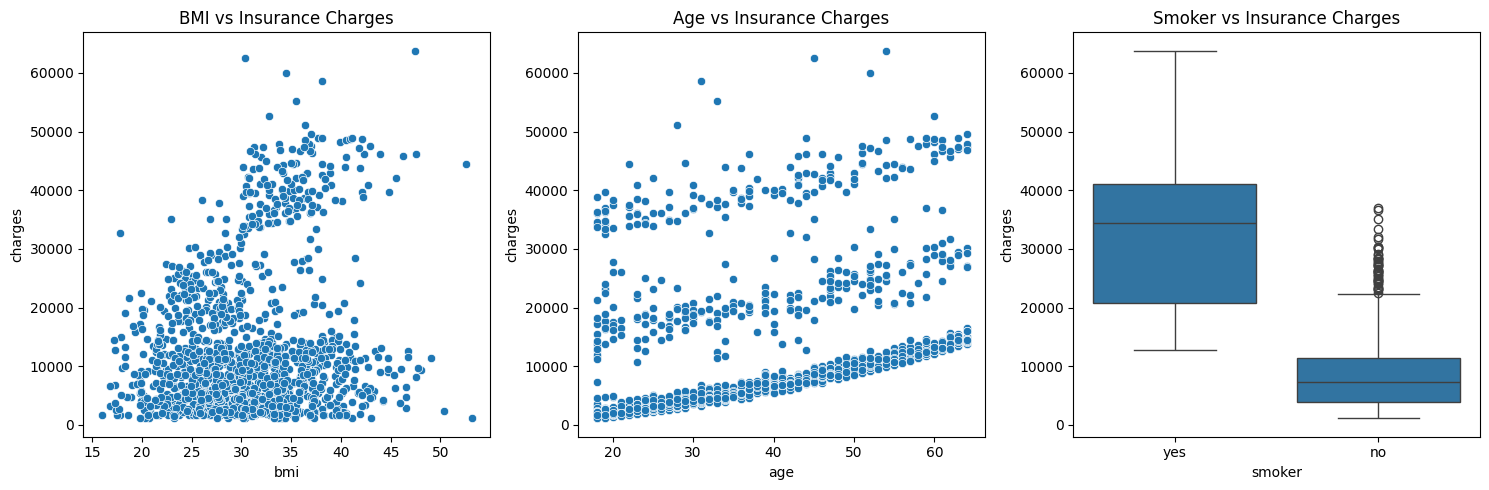

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

insurancedf = pd.read_csv('insurance.csv')

# Checking for missing values
insurancedf.isnull().sum()

# Encode cateegorical variables
encodedf = pd.get_dummies(insurancedf, drop_first=True)

encodedf

# Features and target
X = encodedf.drop('charges', axis=1)
y = encodedf['charges']

print("Features:")
display(X)

print("Target variable:")
display(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualizations: BMI, age, and smoking status vs charges
plt.figure(figsize=(15, 5))

# BMI vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(x='bmi', y='charges', data=insurancedf)
plt.title('BMI vs Insurance Charges')

# Age vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='charges', data=insurancedf)
plt.title('Age vs Insurance Charges')

# Smoker vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=insurancedf)
plt.title('Smoker vs Insurance Charges')

plt.tight_layout()
plt.show()

1. There are no missing values in the dataset.

2. **Data preprocessing**

Encode categorical variables section:

* Converts categorical columns (sex, smoker, region) to numeric using one-hot encoding.
* Drops one level from each category to avoid multicollinearity.

For example:
* sex becomes sex_male
* smoker becomes smoker_yes
* region becomes 3 columns: region_northwest, region_southeast, region_southwest

3. **Model training**

* Splits data into training (80%) and test (20%) sets.
* Trains a Linear Regression model to predict charges.

4. **Model performance**

* MAE (4181.19): On average, the model’s predictions are off by about $4,181.
* RMSE (5796.28): Because RMSE penalizes large errors more, this suggests a few predictions are quite far from the actual values.

For a simple Linear Regression, this is a reasonably expected outcome — there's room for improvement using advanced models or feature engineering.

5. **Visualization Analysis**

**BMI vs Insurance Charges**
* Scatter plot shows a lot of people clustered in the lower BMI and charge range.
* There's a group with high BMI and high charges — likely smokers or people with other risk factors.
* Relationship is weak overall, but there's a visible positive trend for some subgroups.

**Age vs Insurance Charges**
* Clear positive correlation: as age increases, charges tend to increase.
* This makes sense — older individuals are more likely to have health issues and thus higher insurance costs.

**Smoker vs Insurance Charges**
* This is the most dramatic difference.
* Smokers have much higher insurance charges, often in the $30,000–$60,000 range.
* Non-smokers are clustered below $20,000.
* This boxplot confirms smoking is a major driver of insurance cost, and the model likely heavily relies on this feature.